## Labor Market Strength

In [78]:
# Import libraries / preliminaries
%config Completer.use_jedi = False
import pandas as pd
import requests
import io, itertools, time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
plt.rc('axes', edgecolor='lightgray')
plt.rc('ytick',labelsize=8)
plt.rc('xtick',labelsize=9)

# Recession start and end months, from NBER
rec_dt = [('1969-12-01', '1970-11-01'), ('1973-11-01', '1975-03-01'), 
          ('1980-01-01', '1980-07-01'), ('1981-07-01', '1982-11-01'),
          ('1990-07-01', '1991-03-01'), ('2001-04-01', '2001-12-01'), 
          ('2008-01-01', '2009-07-01'), ('2020-02-01', '2020-04-01')]

In [55]:
# Clean data
nfp = ((pd.read_csv('PAYEMS.csv', index_col='DATE', parse_dates=True)
         .loc['2020':, 'PAYEMS']) / 1_000)
nfp.name = 'Actual'

cbo = pd.DataFrame()
for month, year in [('January', 2020), ('February', 2021)]:
    name = f'CBO Projection, {month} {year}'
    cbo[name] = pd.read_excel(f'CBO_{month}_{year}.xlsx', index_col='Date', 
                      parse_dates=True).loc['2019-10-01':'2024-01-01'].iloc[:,0]
cbo = cbo.resample('MS').interpolate().shift(2).loc['2020-03-01':]

data = pd.concat([nfp, cbo], axis=1).dropna(subset='Actual')

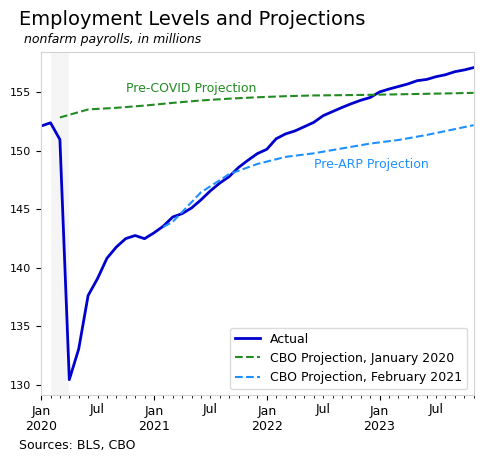

In [96]:
# Create chart
fig, ax = plt.subplots(figsize=(5, 4))
plt.tight_layout()
colors = ['mediumblue', 'forestgreen', 'dodgerblue']
data['Actual'].plot(ax=ax, color=colors[0], lw=2)
data.iloc[:,1].plot(ax=ax, color=colors[1], ls='--')
data.iloc[:,2].loc['2021-02-01':].plot(ax=ax, color=colors[2], ls='--')
# Recession bars
for r_start, r_end in rec_dt:
    ax.axvspan(r_start, r_end, facecolor='whitesmoke', zorder=0)

# legend
ax.legend(edgecolor='lightgray', bbox_to_anchor=(1, 0), 
          loc='lower right', fontsize=9)

# Title and footer
fig.text(0.04, 1.02, 'Employment Levels and Projections', size=14)
subtitle = ('nonfarm payrolls, in millions')
fig.text(0.05, 0.975, subtitle, size=9, style='italic')
footer = ('Sources: BLS, CBO')
fig.text(0.04, -0.04, footer, size=9)

# Annotations
ax.text('2020-10-01', 155, 'Pre-COVID Projection', color='forestgreen', size=9)
ax.text('2022-06-01', 148.5, 'Pre-ARP Projection', color='dodgerblue', size=9)

plt.savefig('chart1.png', bbox_inches='tight')
plt.show()